# Intrinsic dimension estimation experiments

In [9]:
import math_helpers as mh
import constants
import estimators
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import importlib
importlib.reload(mh)
importlib.reload(estimators)

<module 'estimators' from 'c:\\Users\\marka\\OneDrive\\Documents\\Uni\\Edinburgh Uni\\RSCAM\\S2 paper review\\numerical_experiments\\estimators.py'>

In [1]:
# Set parameters:
d = 2           # actual intrinsic dimension of manifold
D = d+1         # ambient dimension - since we're using spheres, these will all sit in R^(d+1)
m = 1000        # number of points in our data set sampled (noisily) from the manifold
eta = 1/(2.001*D)    # parameter for dimension estimation (threshold)
R_sphere = 20   # radius of sphere
s = 1       # size to bound the noise around the manifold
r = 5           # radius of open ball to use as neighbourhood when estimating dimension

## How does the size of the noise affect the accuracy?

In [67]:
num_tests = 10
ss = np.linspace(0, r, num_tests)
prop_correct = np.zeros(num_tests)

for i, s in enumerate(ss):
    X = mh.noisy_sphere(d, R_sphere, s, m)
    results = estimators.tgt_and_dim_estimates(X, r, eta)
    estimated_dimensions = np.array([res[1] for res in results])
    prop_correct[i] = np.sum(estimated_dimensions == d) / m

c:\Users\marka\OneDrive\Documents\Uni\Edinburgh Uni\RSCAM\S2 paper review\numerical_experiments\estimators.py:25: UserWarning: Warning: no points found within radius 5 of the 979th point in X.
  warnings.warn(f"Warning: no points found within radius {r} of the {i}th point in X.")
c:\Users\marka\OneDrive\Documents\Uni\Edinburgh Uni\RSCAM\S2 paper review\numerical_experiments\estimators.py:25: UserWarning: Warning: no points found within radius 5 of the 926th point in X.
  warnings.warn(f"Warning: no points found within radius {r} of the {i}th point in X.")


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(X[:,0], X[:,1], X[:,2])
plt.show()

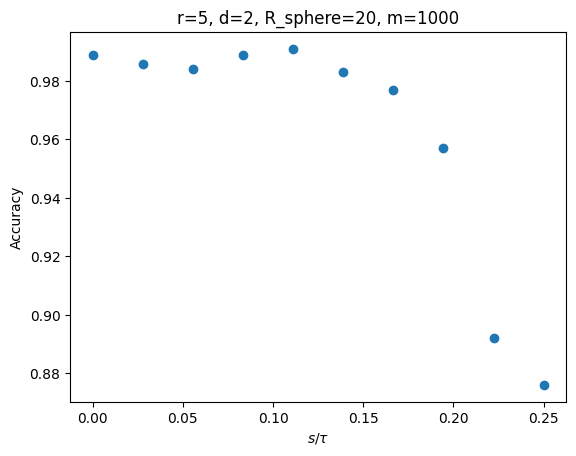

In [74]:
plt.scatter(ss/R_sphere, prop_correct)
plt.xlabel(r"$s/\tau$")
plt.ylabel("Accuracy")
plt.title(f"{r=}, {d=}, {R_sphere=}, {m=}")

plt.show()

## Higher dimensions

In [12]:
d = 3
m = 1000*R_sphere # the surface area scales by approx R_sphere for each dimension we add
num_tests = 10
ss = np.linspace(0, r, num_tests)
prop_correct_3d = np.zeros(num_tests)

for i, s in enumerate(ss):
    print(f"{s=}")
    X = mh.noisy_sphere(d, R_sphere, s, m)
    results = estimators.tgt_and_dim_estimates(X, r, eta, verbose = True)
    estimated_dimensions = np.array([res[1] for res in results])
    prop_correct_3d[i] = np.sum(estimated_dimensions == d) / m

s=0.0
Estimating dimension and tangent space for point  0
Estimating dimension and tangent space for point  100
Estimating dimension and tangent space for point  200


KeyboardInterrupt: 

In [14]:
np.save("X_S3.npy", X)